In [1]:
# Dependencies
%matplotlib notebook
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import os

# Dataset: winequality-red.csv
Linear Regression - The predicted affect of 'alcohol' on red wine 'quality.

**Source:** 
UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Wine+Quality
Data source of origin: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/
Link: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

**Description:**
Alcohol content affects aroma and taste in critical ways, and the sugar content of the grapes determines alcohol content. Vintners test wine regularly and add water, sugar or fruit juice to control alcohol level, taste and other characteristics. If you have any doubts about alcohol being a key component of wine, just take a sip of “dealcoholized wine.” Alcohol content affects both flavor and texture, and it’s evaporating alcohol that carries the aroma of wine to our senses. Alcohol also adds viscosity and helps balance sweetness and acidity. On the other hand, too much can damp-down flavors and aromas, and make a wine seem “hot” on the palate.

**Linear Regression:**
A regression line is simply calculating a line that best fits the data. This is typically done through the least squares method where the line is chosen to have the smallest overall distance to the points.
𝑦=𝜃0+𝜃1𝑥y=θ0+θ1x
	• 𝑦y is the output response
	• 𝑥x is the input feature
	• 𝜃0θ0 is the y-axis intercept
	• 𝜃1θ1 is weight coefficient (slope)

**Variables/Columns:**
All Attribute Information:

Independant Input variables (x) (based on physicochemical tests): 1 - fixed acidity 2 - volatile acidity 3 - citric acid 4 - residual sugar 5 - chlorides 6 - free sulfur dioxide 7 - total sulfur dioxide 8 - density 9 - pH 10 - sulphates 11 - alcohol

Dependant Output variable (y) (based on sensory data): 12 - quality (score between 0 and 10)

**Story - How do the physicochemical factors affect overall red wine quality?**

*In this example we predicted affect of 'alcohol' on red wine 'quality'.*

**Hypothesis**:

Linear Regression: r-squared is: 0.22673436811123157

**Conclusion**
A good R2 Score will be close to 1. The above results individually the model does not predict a solid or good relationship between this factor and quality.

Overall the individual factors (features) do not individually prove to affect the quality based on their scores. When we view the 'Combined' features they have a more high training and test score. This concludes that the quality is more a factor of the overall physicochemical mixture (formula) of factors than any one individual factors (features). 

In [2]:
# This example compares different factors in the wine quality file
df = pd.read_csv(os.path.join('winequality-red.csv'))
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
y = df["quality"]
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [4]:
X = df.drop("quality", axis=1)
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [5]:
print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")

Labels: 0    5
1    5
2    5
3    6
4    5
5    5
6    5
7    7
8    7
9    5
Name: quality, dtype: int64
Data:    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total

In [6]:
X_arr = X.to_numpy()
X_arr

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [7]:
y_arr = y.to_numpy()
y_arr

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [8]:
X_arr[:,10]

array([ 9.4,  9.8,  9.8, ..., 11. , 10.2, 11. ])

<IPython.core.display.Javascript object>


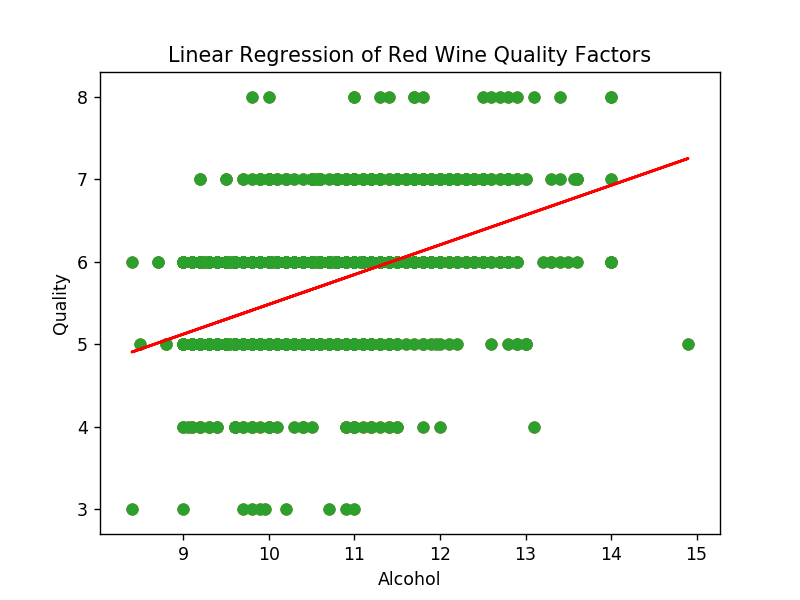

In [9]:
# Plot out rooms versus median house price
x_arr = df['alcohol']
y_arr = df['quality']
plt.scatter(x_arr,y_arr)
plt.title("Linear Regression of Red Wine Quality Factors")
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

In [10]:
# Add the linear regression equation and line to plot
x_arr = df['alcohol']
y_arr = df['quality']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_arr, y_arr)
regress_values = x_arr * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_arr,y_arr)
plt.plot(x_arr,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

In [11]:
# Print out the r-squared value along with the plot.
x_arr = df['alcohol']
y_arr = df['quality']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_arr, y_arr)
regress_values = x_arr * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_arr,y_arr)
plt.plot(x_arr,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Alcohol')
plt.ylabel('Quality')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.22673436811123157
